# Pymaceuticals Inc.
---

## Prep Data

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame

combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [6]:
combined_df['Mouse ID'].value_counts()

Mouse ID
g989    13
m601    10
u364    10
w575    10
q633    10
        ..
v199     1
l872     1
t573     1
o848     1
f932     1
Name: count, Length: 249, dtype: int64

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique() 
duplicates

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
info = combined_df.loc[combined_df['Mouse ID'] == 'g989']
info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicates) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Group data
grouped_df = clean_df.groupby('Drug Regimen')

# Calculate stats
mean = grouped_df['Tumor Volume (mm3)'].mean()
median = grouped_df['Tumor Volume (mm3)'].median()
variance = grouped_df['Tumor Volume (mm3)'].var()
std = grouped_df['Tumor Volume (mm3)'].std()
sem = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({'Mean Tumor Volume':mean, 'Median Tumor Volume':median, 'Tumor Volume Variance':variance, 'Tumor Volume Std. Dev':std, 'Tumor Volume Std. Err':sem})
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen 

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_agg = grouped_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
stats_summary_agg.to_csv('analysis/stats_summary.csv')
stats_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

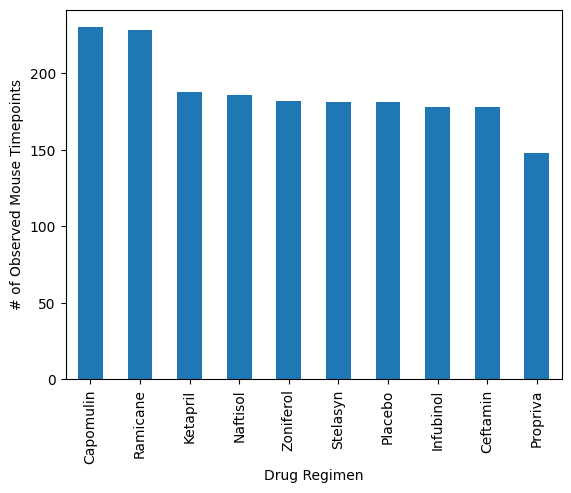

In [13]:
# USING PANDAS - Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen.
drug_series = clean_df['Drug Regimen'].value_counts()
drug_series.plot(kind="bar", ylabel='# of Observed Mouse Timepoints')

Text(0.5, 0, 'Drug Regimen')

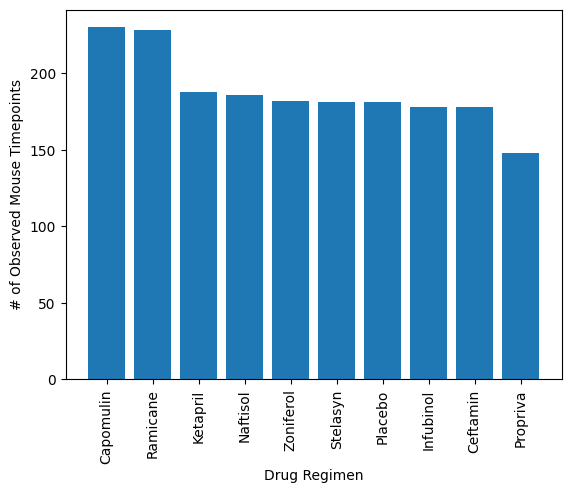

In [14]:
# USING PYPLOT - Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen.
drug_series_df = pd.DataFrame(drug_series)
drug_series_df
plt.bar(drug_series_df.index, drug_series_df['count'])
plt.xticks(rotation=90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

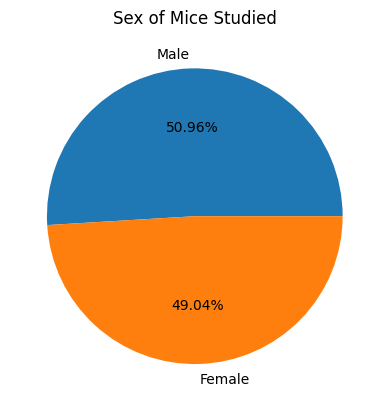

In [15]:
# USING PANDAS - Generate a pie chart showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex = pd.DataFrame(clean_df['Sex'].value_counts())

# Set labels
labels = mouse_sex.index.values

# Set values
sizes = mouse_sex['count'].tolist()

plt.pie(sizes, labels=labels, autopct="%2.2f%%")
plt.title('Sex of Mice Studied')
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

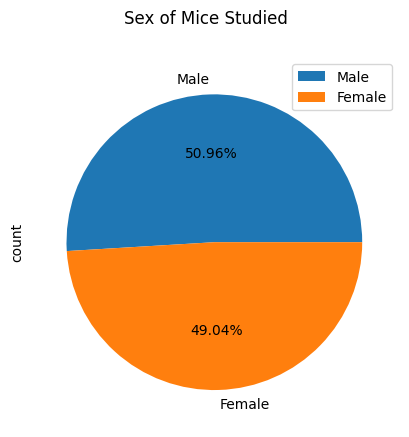

In [16]:
# USING PYPLOT - Generate a pie chart showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_sex.plot(kind='pie', subplots=True, autopct="%2.2f%%", title='Sex of Mice Studied')

## Quartiles, Outliers and Boxplots

In [17]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID').max()
last_timepoint

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,45.000000,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Convert last_timepoint to a df so we can merge properly
last_timepoint_df = last_timepoint.reset_index()
last_timepoint_df.columns = ['Mouse ID', 'Last Timepoint']

# Merge last_timepoint_df with clean_df to get the tumor volume at the last timepoint
filtered_df = pd.merge(clean_df, last_timepoint_df, on='Mouse ID')

# Filter the rows where Timepoint matches Last Timepoint
filtered_df = filtered_df[filtered_df['Timepoint'] == filtered_df['Last Timepoint']]

# Drop the 'Max Timepoint' column (if no longer needed)
filtered_df = filtered_df.drop(columns=['Last Timepoint'])



filtered_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.0,0,Ketapril,Male,15,29
20,x336,0,45.0,0,Naftisol,Female,4,29
53,h428,0,45.0,0,Ketapril,Female,1,27
55,v199,0,45.0,0,Naftisol,Female,17,29
108,o848,0,45.0,0,Stelasyn,Female,14,27


In [19]:
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vols = []

# Loop through the four treatments we want to focus on
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in drug_names:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = filtered_df.loc[filtered_df['Drug Regimen'] == name]
    vol = rows['Tumor Volume (mm3)'].tolist()
    final_tumor_vols.append(vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = rows['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"{name}'s potential outliers: >{round(upper_bound, 3)}, <{round(lower_bound,3)}")

Capomulin's potential outliers: >51.832, <20.705
Ramicane's potential outliers: >54.307, <17.913
Infubinol's potential outliers: >82.741, <36.833
Ceftamin's potential outliers: >87.666, <25.355


/var/folders/6v/g9_8y5jx4vg9cv9hp872jmdc0000gn/T/ipykernel_18216/1231948796.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(drug_names)


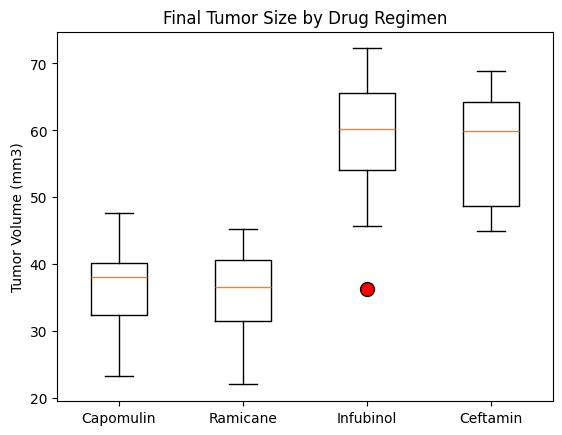

In [30]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(drug_names)
ax1.boxplot(final_tumor_vols, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})
plt.savefig('analysis/tumor_by_drug_bxplt.png')
plt.show()

## Line and Scatter Plots

In [47]:
# Find a single mouse treated with Capomulin
clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin'].tail(5) # u364
capomulin_mouse = clean_df.loc[clean_df['Mouse ID'] == 'u364']

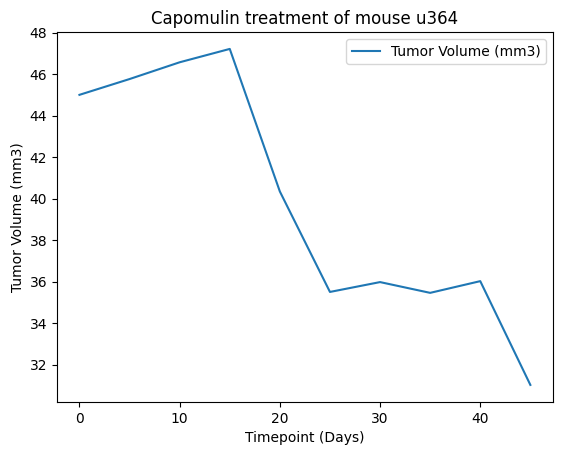

In [43]:
# Generate a line plot of tumor volume vs. time point this mouse
x = 'Timepoint'
y = 'Tumor Volume (mm3)'
title='Capomulin treatment of mouse u364'

capomulin_mouse_plot = capomulin_mouse.plot(x=x, y=y, title=title, ylabel=y, xlabel=(x+' (Days)'))
fig = capomulin_mouse_plot.get_figure()
fig.savefig('analysis/mouse_u364_success.png')

<Axes: title={'center': 'Mouse Weight vs. Avg Tumor Volume (Capomulin Regimen)'}, xlabel='Weight (g)', ylabel='Avg Tumor Vol (mm3)'>

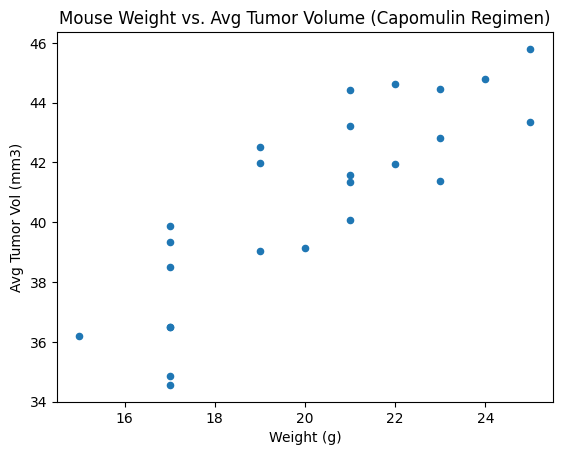

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
plot_this_one_df = capomulin_mice[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']].groupby('Mouse ID').mean()
plot_this_one_df.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Avg Tumor Vol (mm3)', title='Mouse Weight vs. Avg Tumor Volume (Capomulin Regimen)')

## Correlation and Regression

Correlation between mouse weight & avg tumor volume: 0.84


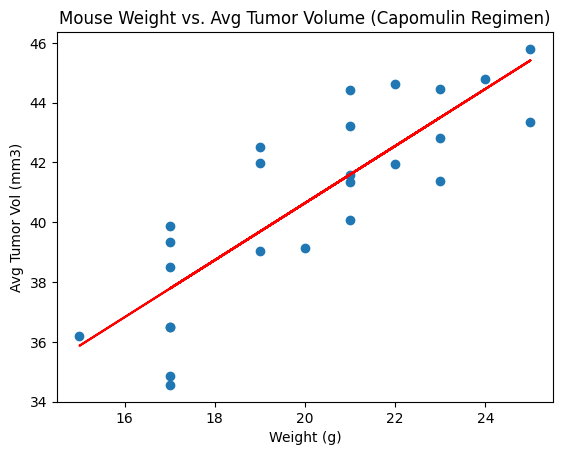

In [27]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x, y = plot_this_one_df['Weight (g)'], plot_this_one_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

# Print r-value
print(f'Correlation between mouse weight & avg tumor volume: {round(rvalue, 2)}')

# Replot the data & the linear regression model
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')
plt.title('Mouse Weight vs. Avg Tumor Volume (Capomulin Regimen)')
plt.savefig('analysis/capomulin_weight_vs_volume.png')
plt.show()